In [ ]:
pip install instagrapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.3/455.3 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.9 MB/s eta 0:00:00
  Created wheel for instagrapi: filename=instagrapi-2.1.3-py3-none-any.whl size=116361 sha256=ee85690cfa7d0c6100c60da19033e78da6a6c1bdc327e3951a105f1d53c7423d
  Stored in directory: /root/.cache/pip/wheels/31/c0/63/7ad4ef727751385676d1987f63b99b76c56adbbd043c17aa59
Successfully built instagrapi
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.27.2
    Uninstalling pydantic_core-2.27.2:
      Successfully uninstalled pydantic_core-2.27.2
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.

1st


Analyzing the last 20 posts of cristiano...

Average Likes per Post: 8074547.7
Engagement Rate Over the Last 20 Posts: 24.91%


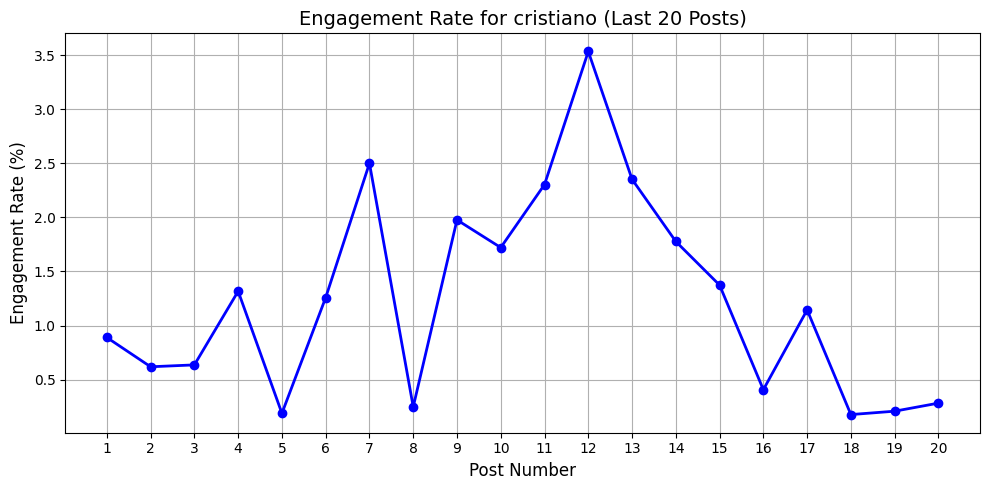

In [ ]:
import matplotlib.pyplot as plt
from instagrapi import Client

user = 'suz0.pvt'
passs = 'letmecook127'

cl = Client()
cl.login(user, passs)

instaID = 'cristiano'
user_id = cl.user_id_from_username(instaID)
medias = cl.user_medias(user_id, 20)
user_info = cl.user_info(user_id)
followers_count = user_info.follower_count

tl = 0
tp = len(medias)

print(f"Analyzing the last {tp} posts of {instaID}...\n")

for media in medias:
    tl += media.like_count

if tp > 0:
    avg_likes = tl / tp
    print(f"Average Likes per Post: {avg_likes}")
else:
    print("No posts available for analysis.")


total_engagement = tl


engagement_rate = (total_engagement / followers_count) * 100

print(f"Engagement Rate Over the Last {tp} Posts: {engagement_rate:.2f}%")


post_numbers = list(range(1, tp+1))
engagement_rates = [media.like_count / followers_count * 100 for media in medias]

plt.figure(figsize=(10, 5))
plt.plot(post_numbers, engagement_rates, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title(f'Engagement Rate for {instaID} (Last {tp} Posts)', fontsize=14)
plt.xlabel('Post Number', fontsize=12)
plt.ylabel('Engagement Rate (%)', fontsize=12)
plt.grid(True)
plt.xticks(post_numbers)
plt.tight_layout()
plt.show()


7th


In [ ]:
import pandas as pd
from textblob import TextBlob

data = [
    {'date': '2023-12-01', 'text': "I had an amazing experience at the new restaurant!"},
    {'date': '2023-12-01', 'text': "The food was bad, and the service was terrible."},
    {'date': '2023-12-02', 'text': "The hotel stay was fantastic, highly recommend it."},
    {'date': '2023-12-02', 'text': "I was disappointed with the cleanliness of the hotel."},
    {'date': '2023-12-03', 'text': "Great customer service at the store, I will return."},
    {'date': '2023-12-03', 'text': "The store was chaotic, and the staff seemed unhelpful."}
]

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['text'].apply(get_sentiment)

print(df)

average_sentiment = df['sentiment'].mean()
overall_sentiment = "Neutral" if average_sentiment == 0 else ("Positive" if average_sentiment > 0 else "Negative")
print(f"Overall Sentiment: {overall_sentiment}")

sentiment_by_date = df.groupby('date')['sentiment'].mean().reset_index()
print(sentiment_by_date)


        date                                               text  sentiment
0 2023-12-01  I had an amazing experience at the new restaur...   0.385227
1 2023-12-01    The food was bad, and the service was terrible.  -0.850000
2 2023-12-02  The hotel stay was fantastic, highly recommend...   0.280000
3 2023-12-02  I was disappointed with the cleanliness of the...  -0.750000
4 2023-12-03  Great customer service at the store, I will re...   0.800000
5 2023-12-03  The store was chaotic, and the staff seemed un...   0.000000
Overall Sentiment: Negative
        date  sentiment
0 2023-12-01  -0.232386
1 2023-12-02  -0.235000
2 2023-12-03   0.400000


2nd

     post_type       likes    comments      shares  total_engagement  engagement_rate
0  educational  456.566667  236.966667   95.266667        788.800000         3.368734
1  interactive  524.272727  226.363636   90.818182        841.454545         2.540103
2  promotional  479.351351  263.702703  109.351351        852.405405         3.427241


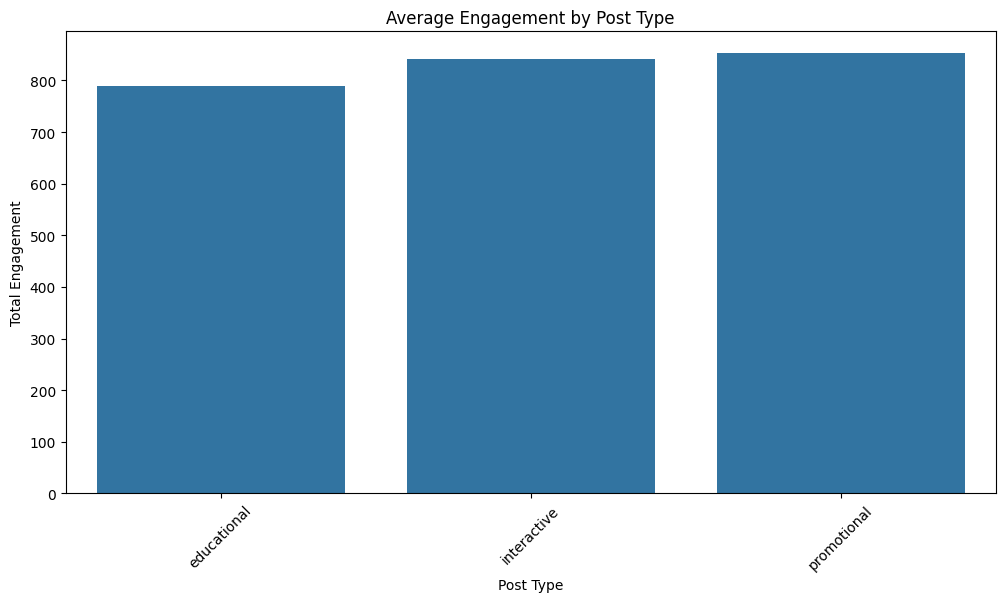

Best performing post: promotional with 852.41 engagement.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/synthetic_social_media_posts.csv')

data['total_engagement'] = data['likes'] + data['comments'] + data['shares']
data['engagement_rate'] = data['total_engagement'] / (data['likes'] + 1)

engagement_summary = data.groupby('post_type').agg({
    'likes': 'mean',
    'comments': 'mean',
    'shares': 'mean',
    'total_engagement': 'mean',
    'engagement_rate': 'mean'
}).reset_index()

print(engagement_summary)

plt.figure(figsize=(12, 6))
sns.barplot(x='post_type', y='total_engagement', data=engagement_summary)
plt.title('Average Engagement by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Total Engagement')
plt.xticks(rotation=45)
plt.show()

best_type = engagement_summary.loc[engagement_summary['total_engagement'].idxmax()]
print(f"Best performing post: {best_type['post_type']} with {best_type['total_engagement']:.2f} engagement.")


3rd


  post_type        likes    comments      shares  total_engagement  engagement_rate
0  carousel  2147.120000  271.920000   94.960000       2514.000000         1.463138
1     image  2548.750000  288.416667  105.666667       2942.833333         1.339138
2     video  2327.586207  237.034483  110.241379       2674.862069         1.307723


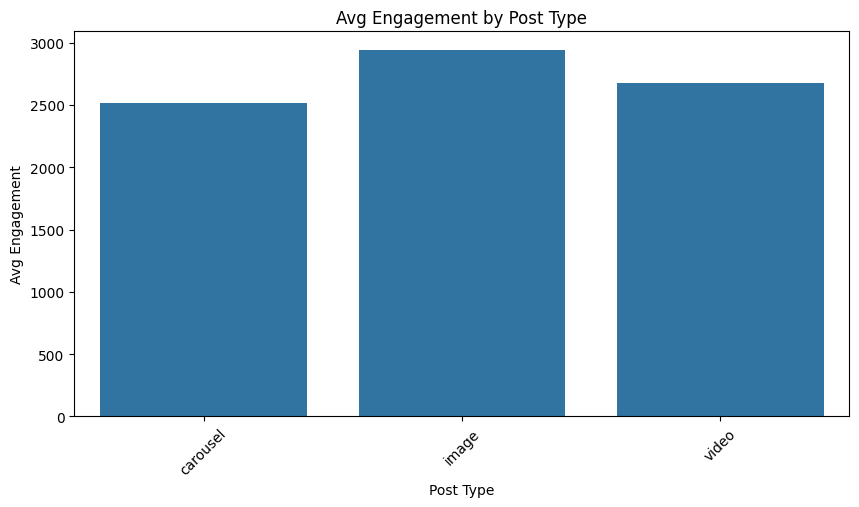

Best post type: 'image' with avg engagement of 2942.83.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/fashion_competitor_data_updated.csv')

data['total_engagement'] = data['likes'] + data['comments'] + data['shares']
data['engagement_rate'] = data['total_engagement'] / (data['likes'] + 1)

engagement_summary = data.groupby('post_type').agg({
    'likes': 'mean',
    'comments': 'mean',
    'shares': 'mean',
    'total_engagement': 'mean',
    'engagement_rate': 'mean'
}).reset_index()

print(engagement_summary)

plt.figure(figsize=(10, 5))
sns.barplot(x='post_type', y='total_engagement', data=engagement_summary)
plt.title('Avg Engagement by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Avg Engagement')
plt.xticks(rotation=45)
plt.show()

best_type = engagement_summary.loc[engagement_summary['total_engagement'].idxmax()]
print(f"Best post type: '{best_type['post_type']}' with avg engagement of {best_type['total_engagement']:.2f}.")
